In [1]:
import os
import tarfile
import urllib.request
import pandas as pd
import csv
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

In [2]:
import pandas as pd

video_games = pd.read_csv('processed_video_games_data.csv')

#video_games = pd.DataFrame(data)

#video_games = video_games.dropna()

#video_games =  data.drop(columns=["NA_Sales","EU_Sales","JP_Sales","Other_Sales"])

In [3]:
#video_games = video_games.dropna()


In [4]:
video_games.to_csv('processed_video_games_data.csv', index=False)

In [5]:
video_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6825 entries, 0 to 6824
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             6825 non-null   object 
 1   Platform         6825 non-null   object 
 2   Year_of_Release  6825 non-null   float64
 3   Genre            6825 non-null   object 
 4   Publisher        6825 non-null   object 
 5   Global_Sales     6825 non-null   float64
 6   Critic_Score     6825 non-null   float64
 7   Critic_Count     6825 non-null   float64
 8   User_Score       6825 non-null   float64
 9   User_Count       6825 non-null   float64
 10  Developer        6825 non-null   object 
 11  Rating           6825 non-null   object 
dtypes: float64(6), object(6)
memory usage: 640.0+ KB


In [6]:
video_games.head()

,Name,Platform,Year_of_Release,Genre,Publisher,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,35.52,82.0,73.0,8.3,709.0,Nintendo,E
2,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,32.77,80.0,73.0,8.0,192.0,Nintendo,E
3,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,29.80,89.0,65.0,8.5,431.0,Nintendo,E
4,Wii Play,Wii,2006.0,Misc,Nintendo,28.92,58.0,41.0,6.6,129.0,Nintendo,E


In [7]:
video_games.describe()

,Year_of_Release,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
count,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000
mean,2007.436777,0.777590,70.272088,28.931136,7.185626,174.722344
std,4.211248,1.963443,13.868572,19.224165,1.439942,587.428538
min,1985.000000,0.010000,13.000000,3.000000,0.500000,4.000000
25%,2004.000000,0.110000,62.000000,14.000000,6.500000,11.000000
50%,2007.000000,0.290000,72.000000,25.000000,7.500000,27.000000
75%,2011.000000,0.750000,80.000000,39.000000,8.200000,89.000000
max,2016.000000,82.530000,98.000000,113.000000,9.600000,10665.000000


In [8]:
# Analysis of variance (ANOVA) for documentation 
#R. Lowry, “Concepts and Applications of Inferential Statistics”, Chapter 14, 2014, http://vassarstats.net/textbook/

#[2]
#G.W. Heiman, “Understanding research methods and statistics: An integrated introduction for psychology”, Houghton, Mifflin and Company, 2001.

#[3]
#G.H. McDonald, “Handbook of Biological Statistics”, One-way ANOVA. http://www.biostathandbook.com/onewayanova.html



In [9]:
import pandas as pd
from scipy.stats import f_oneway
# genere test
# Group data by categorical variable
action = video_games[video_games['Genre'] == 'Action']['Global_Sales']
sports = video_games[video_games['Genre'] == 'Sports']['Global_Sales']
shooter = video_games[video_games['Genre'] == 'Shooter']['Global_Sales']
role_playing = video_games[video_games['Genre'] == 'Role-Playing']['Global_Sales']
misc = video_games[video_games['Genre'] == 'Misc']['Global_Sales']
strategy = video_games[video_games['Genre'] == 'Strategy']['Global_Sales']
racing = video_games[video_games['Genre'] == 'Racing']['Global_Sales']
platform = video_games[video_games['Genre'] == 'Platform']['Global_Sales']
simulation = video_games[video_games['Genre'] == 'Simulation']['Global_Sales']
fighting = video_games[video_games['Genre'] == 'Fighting']['Global_Sales']
adventure = video_games[video_games['Genre'] == 'Adventure']['Global_Sales']
puzzle = video_games[video_games['Genre'] == 'Puzzle']['Global_Sales']

# Perform ANOVA
f, p = f_oneway(action, sports, shooter, role_playing, misc, strategy, racing, platform, simulation, fighting, adventure, puzzle)

print('F-value:', f)
print('P-value:', p)

F-value: 5.220909848423417
P-value: 3.021798346091957e-08


In [10]:
type(puzzle)

pandas.core.series.Series

In [12]:
# Drop the Platform, Genre, Publisher, and Developer columns
data_no_cat= video_games.drop(columns=['Name','Platform', 'Genre', 'Publisher', 'Developer','Rating'])




In [13]:
# F shows us that theres is a lot of variance between the groups
#P  if the p-value is small (ussaly less 0.05) it indicates there's significant diffrence between the groups as seen here 
# we can there for conclude that Genere has a meaning full effect on 

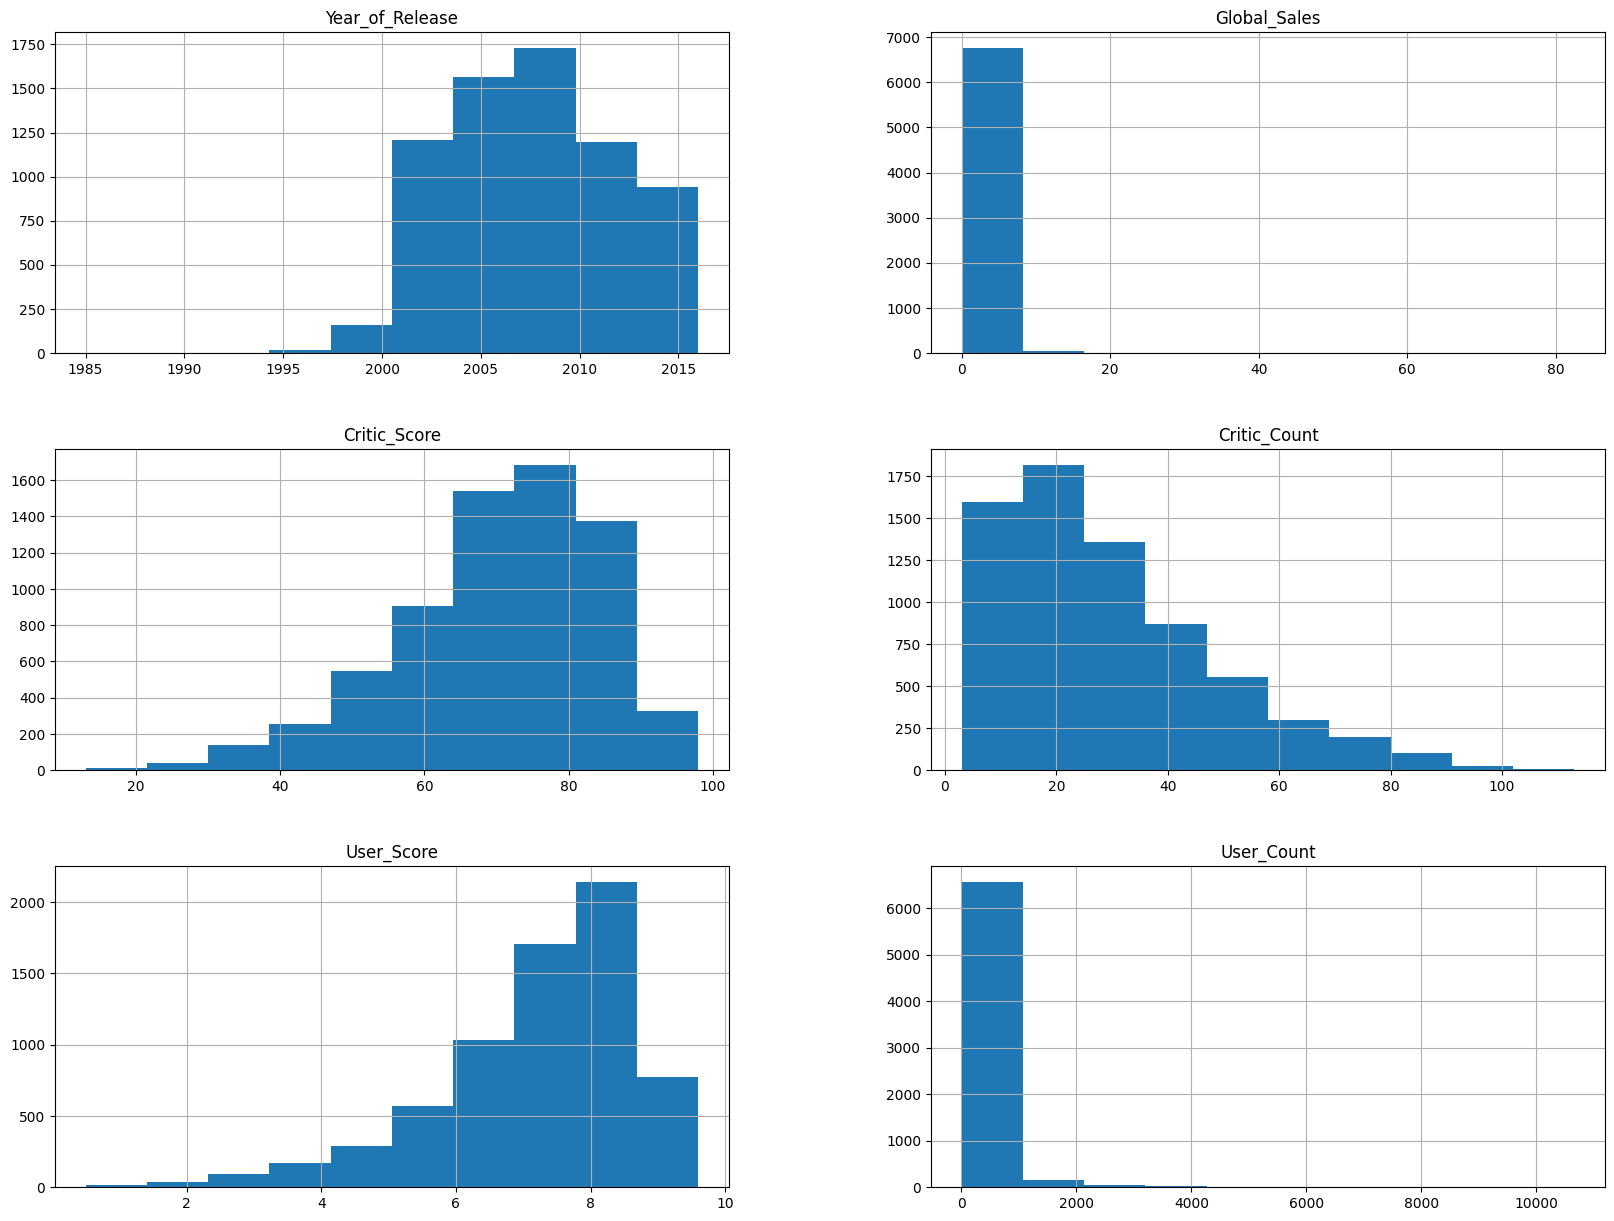

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
data_no_cat.hist(bins=10, figsize=(20,15))
#save_fig("attribute_histogram_plots")
plt.show()

In [18]:
corr_matrix = data_no_cat.corr()

In [21]:
corr_matrix["Global_Sales"].sort_values(ascending=False)

Global_Sales       1.000000
Critic_Count       0.290397
User_Count         0.264151
Critic_Score       0.237556
User_Score         0.088349
Year_of_Release    0.006661
Name: Global_Sales, dtype: float64

array([[<Axes: xlabel='Global_Sales', ylabel='Global_Sales'>,
        <Axes: xlabel='Critic_Count', ylabel='Global_Sales'>,
        <Axes: xlabel='User_Count', ylabel='Global_Sales'>,
        <Axes: xlabel='Critic_Score', ylabel='Global_Sales'>,
        <Axes: xlabel='User_Score', ylabel='Global_Sales'>,
        <Axes: xlabel='Year_of_Release', ylabel='Global_Sales'>],
       [<Axes: xlabel='Global_Sales', ylabel='Critic_Count'>,
        <Axes: xlabel='Critic_Count', ylabel='Critic_Count'>,
        <Axes: xlabel='User_Count', ylabel='Critic_Count'>,
        <Axes: xlabel='Critic_Score', ylabel='Critic_Count'>,
        <Axes: xlabel='User_Score', ylabel='Critic_Count'>,
        <Axes: xlabel='Year_of_Release', ylabel='Critic_Count'>],
       [<Axes: xlabel='Global_Sales', ylabel='User_Count'>,
        <Axes: xlabel='Critic_Count', ylabel='User_Count'>,
        <Axes: xlabel='User_Count', ylabel='User_Count'>,
        <Axes: xlabel='Critic_Score', ylabel='User_Count'>,
        <Axes: xla

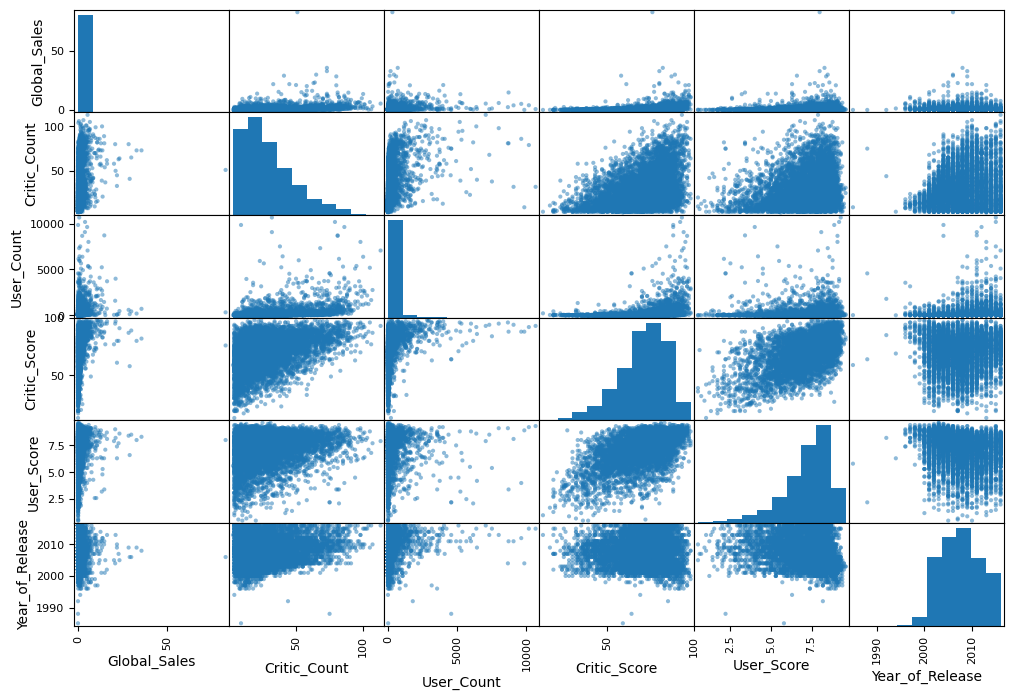

In [25]:
from pandas.plotting import scatter_matrix

attributes = ["Global_Sales", "Critic_Count", "User_Count", "Critic_Score","User_Score","Year_of_Release"]
scatter_matrix(data_no_cat[attributes], figsize=(12, 8))

<Axes: xlabel='Critic_Count', ylabel='User_Count'>

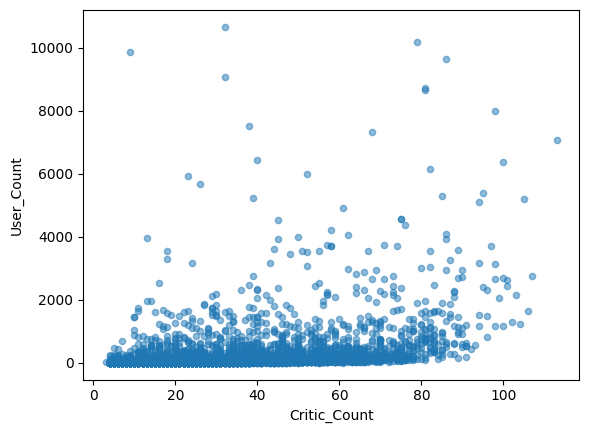

In [26]:
video_games.plot(kind="scatter", x ="Critic_Count", y="User_Count", alpha= 0.5)